<a href="https://colab.research.google.com/github/mariuskiefer/Classification_Propaganda/blob/main/BA_Marius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install required dependencies for Google Colab

In [3]:
!pip install regex

In [4]:
!pip install -U scikit-learn==1.2.2

In [5]:
!pip install --user -U nltk

In [6]:
!pip install imbalanced-learn

# Import libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle

In [105]:
import re
from sklearn.datasets import load_files
from nltk.corpus import stopwords
import nltk

# Get the Data to and save as pandas Dataframe

In [ ]:
#Get the data
path = '/content/drive/MyDrive/ba_data/Colab_data/filtered_tweets_with_bot_no_news'
df = pd.read_pickle(path)

In [ ]:
#Overview over data
df.head(5)

In [ ]:
#Open Deleted and Non-Deleted ID-files to extract the tweets from original data

with open('/content/drive/MyDrive/ba_data/Colab_data/deleted_ids.txt') as delfile:
    deleted_ids = delfile.read().splitlines()


with open('/content/drive/MyDrive/ba_data/Colab_data/nondeleted_ids.txt') as nondelfile:
    nondeleted_ids = nondelfile.read().splitlines()


col_one_list = df['id'].tolist()

#Check if the array
print(len(deleted_ids))
print(len(nondeleted_ids))
print(len(col_one_list))

In [ ]:
#Function to create 'Status' feature which holds information, if a tweet got deleted or not
def classify_id(id_value):
    if str(id_value) in deleted_ids:
        return 1
    elif str(id_value) in nondeleted_ids:
        return 0
    else:
        return 'Unknown'

df['status'] = df['id'].apply(classify_id)

print(df[['id','status']].head(80))

In [ ]:
#Create new dataframe which only contains the deleted/non-deleted labeled data
newdf = df.loc[df['status'] != 'Unknown'].copy()

newdf.head(5)

In [ ]:
#check length
print(len(newdf.index))

In [ ]:
#get the bot tweet ids and store them in an array
file = open('/content/drive/MyDrive/ba_data/Colab_data/bot_tweet_ids.json')
data = json.load(file)
botidlist = []

for i in data:
    botidlist.append(str(i))

print(len(botidlist))

In [ ]:
#create function to label tweet as bot tweet
def classify_id_bot(id_value):
    if str(id_value) in botidlist:
        return 1
    else:
        return 0

newdf['bot_status'] = newdf['id'].apply(classify_id_bot)

In [ ]:
#Check of the new columns
newdf.loc[: , ['id','bot_status', 'status']]

In [ ]:
#Create function to make plot easier
def classify_bot_del(bot_value, del_value):
    if ((int(bot_value) == 1 ) and (int(del_value) == 1)):
        return (1,1)
    elif ((int(bot_value) == 1 ) and (int(del_value) != 1)):
        return (1,0)
    elif ((int(bot_value) != 1) and (int(del_value) == 1)):
        return (0,1)
    elif ((int(bot_value) != 1) and (int(del_value) != 1)):
        return (0,0)
    else:
        return 'Something went wrong'

In [ ]:
#apply function
newdf['bot_del_tupel'] = newdf.apply(lambda x: classify_bot_del(x['bot_status'], x['status']), axis=1)

In [ ]:
newdf.to_pickle("/content/drive/MyDrive/ba_data/Colab_data/newdf.pkl")

# Load the new dataframe to skip the steps before and save time running the whole notebook

In [326]:
newdf = pd.read_pickle("/content/drive/MyDrive/ba_data/Colab_data/newdf.pkl")

In [327]:
newdf.head(5)

,id,created_at,text,author_id,context_annotations,lang,reply_settings,referenced_tweets,conversation_id,in_reply_to_user_id,...,profile_image_url_author,username_author,verified_author,entities_author,pinned_tweet_id_author,location_author,withheld_author,status,bot_status,bot_del_tupel
0,1488409670985342976,2022-02-01 07:11:33+00:00,RT @marylin45277502: Bravo Russia. Zionists ar...,1403385555522568192,"[{'domain': {'id': '67', 'name': 'Interests an...",en,everyone,"[{'type': 'retweeted', 'id': '1488233560343519...",1488409670985342976,NaN,...,https://pbs.twimg.com/profile_images/145772126...,2K2CxBg235TwT8H,False,NaN,NaN,NaN,NaN,0,0,"(0, 0)"
1,1488519264965632000,2022-02-01 14:27:02+00:00,@SarahMacFCDO @NATO @trussliz Does it mean tha...,131222694,"[{'domain': {'id': '88', 'name': 'Political Bo...",en,everyone,"[{'type': 'replied_to', 'id': '148843635517684...",1488436355176841216,1.194610e+18,...,https://pbs.twimg.com/profile_images/154279417...,boriskulikov83,False,"{'description': {'hashtags': [{'start': 93, 'e...",1458364125608755203,新潟 東京 福岡 長崎 ロシア（南クリル諸島）,NaN,0,0,"(0, 0)"
2,1488722144221556736,2022-02-02 03:53:12+00:00,@jensstoltenberg @SecBlinken @RauZbigniew @Jos...,131222694,"[{'domain': {'id': '10', 'name': 'Person', 'de...",en,everyone,"[{'type': 'replied_to', 'id': '148862016316767...",1488620163167670272,2.079607e+07,...,https://pbs.twimg.com/profile_images/154279417...,boriskulikov83,False,"{'description': {'hashtags': [{'start': 93, 'e...",1458364125608755203,新潟 東京 福岡 長崎 ロシア（南クリル諸島）,NaN,0,0,"(0, 0)"
3,1488778932396732416,2022-02-02 07:38:52+00:00,#StandWithRussia 🇷🇺🪖💪🏼,1455721787090743296,NaN,und,everyone,NaN,1488778932396732416,NaN,...,https://pbs.twimg.com/profile_images/153765746...,ussygussy369,False,NaN,NaN,The Land,NaN,1,0,"(0, 1)"
4,1488959106962669568,2022-02-02 19:34:49+00:00,.@mfa_russia is right to mock @BorisJohnson an...,14109618,"[{'domain': {'id': '10', 'name': 'Person', 'de...",en,everyone,NaN,1488959106962669568,NaN,...,https://pbs.twimg.com/profile_images/68370635/...,sengeezer,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,"London, England",NaN,1,0,"(0, 1)"


#Plot for Bot feature

In [ ]:
newdf.loc[: , ['id','bot_status', 'status','bot_del_tupel']]

In [ ]:
print('Not Bot, Not Deleted: ' + str(len(newdf[newdf['bot_del_tupel']==(0,0)])))
print('Bot, Not Deleted: ' + str(len(newdf[newdf['bot_del_tupel']==(1,0)])))
print('Not Bot, Deleted: ' + str(len(newdf[newdf['bot_del_tupel']==(0,1)])))
print('Bot, Deleted: ' + str(len(newdf[newdf['bot_del_tupel']==(1,1)])))

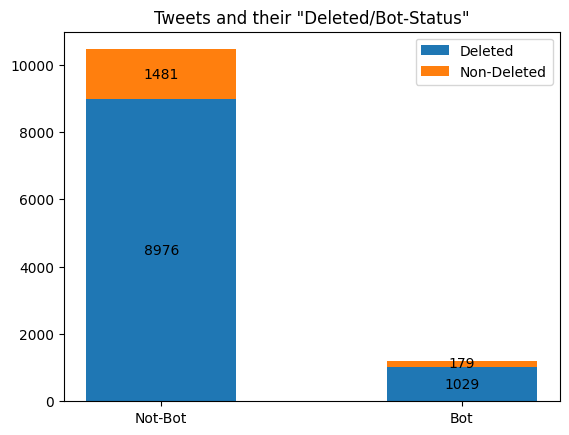

In [184]:
#create plot to proof/ disproof first thought about bot/deleted (Total amount of tweets)
bot_status = ('Not-Bot', 'Bot')
deleted_status = {
    'Deleted': np.array([len(newdf[newdf['bot_del_tupel']==(0,1)]), len(newdf[newdf['bot_del_tupel']==(1,1)])]),
    'Non-Deleted': np.array([len(newdf[newdf['bot_del_tupel']==(0,0)]), len(newdf[newdf['bot_del_tupel']==(1,0)])]),
}
width = 0.5  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(2)

for bot, del_count in deleted_status.items():
    p = ax.bar(bot_status, del_count, width, label=bot, bottom=bottom)
    bottom += del_count

    ax.bar_label(p, label_type='center')

ax.set_title('Tweets and their \"Deleted/Bot-Status\"')
ax.legend()

plt.show()

In [185]:
#Calculate percantages
bd_val = len(newdf[newdf['bot_del_tupel']==(1,1)])
nd_val = len(newdf[newdf['bot_del_tupel']==(0,1)])
bn_val = len(newdf[newdf['bot_del_tupel']==(1,0)])
nn_val = len(newdf[newdf['bot_del_tupel']==(0,0)])

total_bot = bd_val + bn_val
total_notbot = nd_val + nn_val

per_bd_val = bd_val/total_bot
per_nd_val = nd_val/total_notbot
per_bn_val = bn_val/total_bot
per_nn_val = nn_val/total_notbot

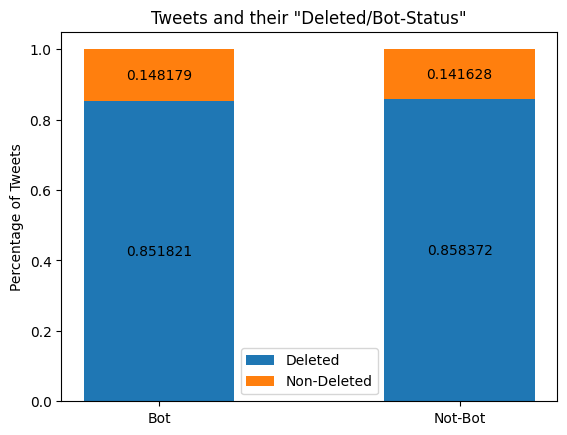

In [186]:
#create plot to proof/ disproof first thought about bot/deleted (Percentage of tweets)
bot_status = ('Bot', 'Not-Bot')

deleted_status = {
    'Deleted': np.array([per_bd_val , per_nd_val]),
    'Non-Deleted': np.array([per_bn_val, per_nn_val]),
}
width = 0.5  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(2)

for bot, del_count in deleted_status.items():
    p = ax.bar(bot_status, del_count, width, label=bot, bottom=bottom)
    bottom += del_count

    ax.bar_label (p,label_type='center', fmt='%g')

plt.ylabel('Percentage of Tweets')

ax.set_title('Tweets and their \"Deleted/Bot-Status\"')
ax.legend()

plt.show()

# Machine Learning Part (Preprocessing and 4 Classifiers)

In [328]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [329]:
def convert_hashtags(frame_input):
  #for i in frame_input:
    hashtag_array = []
    #print(frame_input)
    for m in frame_input:
      text = re.sub(r'start', '', str(m))
      text = re.sub(r'end', '', text)
      text = re.sub(r'tag', '', text)
      text = text.split(":")
      text = re.sub(r'}', '', text[3])
      text = re.sub(r'\'', '', text)
      text = re.sub(r' ', '', text)
      hashtag_array.append(text)
    return(hashtag_array)

In [330]:
def convert_time(input):
    text = re.sub(r'-', ' ', str(input))
    text = re.sub(r':', ' ', text)
    text = re.sub(r'\+', '', text)
    text = re.sub(r' ', '', text)
    return float('0' + '.'  + str(text))

In [331]:
def convert_verified(input):
  if input == False:
    return 0
  elif input == True:
    return 1
  else:
    return 'Error'

In [332]:
print(list(newdf))

['id', 'created_at', 'text', 'author_id', 'context_annotations', 'lang', 'reply_settings', 'referenced_tweets', 'conversation_id', 'in_reply_to_user_id', 'in_reply_to_user', 'attachments', 'geo', 'bot', 'majority_lang', 'bot_score', 'mentions', 'hashtags', 'annotations', 'urls', 'translated', 'tag', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'public_metrics_author', 'url_author', 'id_author', 'protected_author', 'created_at_author', 'name_author', 'description_author', 'profile_image_url_author', 'username_author', 'verified_author', 'entities_author', 'pinned_tweet_id_author', 'location_author', 'withheld_author', 'status', 'bot_status', 'bot_del_tupel']


In [333]:
#Y Value for classifier models
Y = newdf['status'].to_numpy()
print(Y.shape)

(11665,)


In [334]:
#Select these 8 features for our models
newdf = newdf.loc[:, ['text', 'created_at','hashtags','retweet_count','reply_count', 'like_count','description_author','verified_author', 'bot_status']]

In [335]:
newdf.hashtags.ffill(inplace = True)
newdf['hashtags'] = newdf['hashtags'].apply(convert_hashtags)

In [336]:
#newdf.shape

In [337]:
#Store feature we need to vectorize in a new dataframe
vectorizedf = newdf.loc[:, ['text', 'hashtags', 'description_author']]
#vectorizedf.head()

In [338]:
#print features of dataframes
print(list(newdf))
print(list(vectorizedf))

['text', 'created_at', 'hashtags', 'retweet_count', 'reply_count', 'like_count', 'description_author', 'verified_author', 'bot_status']
['text', 'hashtags', 'description_author']


In [339]:
#edit the text contained in vectorizedf features to fit better into vectorizer

from nltk.stem import WordNetLemmatizer

def feature_totext(feature):

  X = feature

  texts = []

  stemmer = WordNetLemmatizer()

  for sen in X:
      # Remove all the special characters
      text = re.sub(r'\W', ' ', str(sen))

      # remove all single characters
      text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

      # Remove single characters from the start
      text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

      # Substituting multiple spaces with single space
      text = re.sub(r'\s+', ' ', text, flags=re.I)

      # Removing prefixed 'b'
      text = re.sub(r'^b\s+', '', text)

      # Converting to Lowercase
      text = text.lower()

      # Lemmatization
      text = text.split()

      text = [stemmer.lemmatize(word) for word in text]
      text = ' '.join(text)

      texts.append(text)



  return texts

In [340]:
#check df
#newdf.head(5)

In [341]:
#vectorize data and add to numpy array

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

list_input = []

for i in vectorizedf:

  m = feature_totext(vectorizedf[i])
  #print(m)

  vectorizer = CountVectorizer(max_features=1500, min_df=4, max_df=0.9, stop_words=stopwords.words('english'))
  X = vectorizer.fit_transform(m).toarray()

  tfidfconverter = TfidfTransformer()
  X = tfidfconverter.fit_transform(X).toarray()

  list_input.append(X)

  print(X.shape)


data_numpy = np.concatenate(list_input, axis = 1)
X = data_numpy

print(data_numpy.shape)
print(X.shape)

(11665, 1500)
(11665, 541)
(11665, 1500)
(11665, 3541)
(11665, 3541)


In [342]:
#get the values of the rest of newdf which did not get vectorized

like_count_array = newdf['like_count'].to_numpy()
like_count_array = like_count_array[:, np.newaxis]
print(like_count_array.shape)
print(like_count_array)

rt_count_array = newdf['retweet_count'].to_numpy()
rt_count_array = rt_count_array[:, np.newaxis]
print(rt_count_array.shape)
print(rt_count_array)

reply_count_array = newdf['reply_count'].to_numpy()
reply_count_array = reply_count_array[:, np.newaxis]
print(reply_count_array.shape)
print(reply_count_array)

newdf['created_at'] = newdf['created_at'].apply(convert_time)
created_array = newdf['created_at'].to_numpy()
created_array = created_array[:, np.newaxis]
print(created_array.shape)
print(created_array)

newdf['verified_author'] = newdf['verified_author'].apply(convert_verified)
verified_array = newdf['verified_author'].to_numpy()
verified_array = verified_array[:, np.newaxis]
print(verified_array.shape)
print(verified_array)

bot_array = newdf['bot_status'].to_numpy()
bot_array = bot_array[:, np.newaxis]
print(bot_array.shape)
print(bot_array)

(11665, 1)
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
(11665, 1)
[[ 4]
 [ 0]
 [ 0]
 ...
 [98]
 [ 0]
 [ 0]]
(11665, 1)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
(11665, 1)
[[0.20220201]
 [0.20220201]
 [0.20220202]
 ...
 [0.20220228]
 [0.20220228]
 [0.20220228]]
(11665, 1)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
(11665, 1)
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [343]:
#concat all numpy arrays of vectorized features and the rest
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#reduced_data = pca.fit_transform(X)

joined_array = np.concatenate((X, like_count_array, rt_count_array, reply_count_array, created_array, verified_array, bot_array), axis = 1)
joined_array.shape

(11665, 3547)

In [344]:
#Set X for classifier models

X = joined_array

In [345]:
#X = X[:, 1058:2058]

In [346]:
#Y value as numpy array
Y = np.array(Y, dtype = np.int32)
print(Y.dtype)
print(Y.sum())

int32
10005


In [347]:
#imports for classifiers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [348]:
#DummyClassifier

X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X, Y, test_size=0.2, random_state=0)



# Perform random oversampling
ros = RandomOverSampler(random_state=0)
X_train_ros_dummy, y_train_ros_dummy = ros.fit_resample(X_train_dummy, y_train_dummy)

dummy_classifier = DummyClassifier(strategy='uniform')
dummy_classifier.fit(X_train_ros_dummy, y_train_ros_dummy)

y_pred_dummy = dummy_classifier.predict(y_test_dummy)

print(confusion_matrix(y_test_dummy,y_pred_dummy))
print(classification_report(y_test_dummy,y_pred_dummy))
print('F1 Score: {:.0%}'.format(f1_score(y_test_dummy,y_pred_dummy)))
print('Balanced Accuracy Score: {:.0%}'.format(balanced_accuracy_score(y_test_dummy,y_pred_dummy)))


[[ 156  154]
 [1022 1001]]
              precision    recall  f1-score   support

           0       0.13      0.50      0.21       310
           1       0.87      0.49      0.63      2023

    accuracy                           0.50      2333
   macro avg       0.50      0.50      0.42      2333
weighted avg       0.77      0.50      0.57      2333

F1 Score: 63%
Balanced Accuracy Score: 50%


In [349]:
#RandomForest

X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X, Y, test_size=0.2, random_state=0)



# Perform random oversampling but not needed for this classifier, since class_weight='balanced' parameter
#ros = RandomOverSampler(random_state=0)
#X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

RFCclassifier = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight= 'balanced')
RFCclassifier.fit(X_train_rfc, y_train_rfc)

y_pred_rfc = RFCclassifier.predict(X_test_rfc)

print(confusion_matrix(y_test_rfc,y_pred_rfc))
print(classification_report(y_test_rfc,y_pred_rfc))
print('F1 Score: {:.0%}'.format(f1_score(y_test_rfc,y_pred_rfc)))
print('Balanced Accuracy Score: {:.0%}'.format(balanced_accuracy_score(y_test_rfc,y_pred_rfc)))


[[  59  251]
 [ 217 1806]]
              precision    recall  f1-score   support

           0       0.21      0.19      0.20       310
           1       0.88      0.89      0.89      2023

    accuracy                           0.80      2333
   macro avg       0.55      0.54      0.54      2333
weighted avg       0.79      0.80      0.79      2333

F1 Score: 89%
Balanced Accuracy Score: 54%


In [350]:
#AdaBoost

X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X, Y, test_size=0.2, random_state=0)



# Perform random oversampling
adaros = RandomOverSampler(random_state=0)
X_train_ros_ada, y_train_ros_ada = adaros.fit_resample(X_train_ada, y_train_ada)

Adaclassifier = AdaBoostClassifier(n_estimators=250, random_state=0)
Adaclassifier.fit(X_train_ros_ada, y_train_ros_ada)

y_pred_ada = Adaclassifier.predict(X_test_ada)

print(confusion_matrix(y_test_ada,y_pred_ada))
print(classification_report(y_test_ada,y_pred_ada))
print('F1 Score: {:.0%}'.format(f1_score(y_test_ada,y_pred_ada)))
print('Balanced Accuracy Score: {:.0%}'.format(balanced_accuracy_score(y_test_ada,y_pred_ada)))


[[ 169  141]
 [ 734 1289]]
              precision    recall  f1-score   support

           0       0.19      0.55      0.28       310
           1       0.90      0.64      0.75      2023

    accuracy                           0.62      2333
   macro avg       0.54      0.59      0.51      2333
weighted avg       0.81      0.62      0.68      2333

F1 Score: 75%
Balanced Accuracy Score: 59%


In [351]:
#DecisionTree


X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, Y, test_size=0.2, random_state=0)


#dt_scaler = MinMaxScaler()
#dt_scaler.fit(X_train_dt)
#X_train_dt = dt_scaler.transform(X_train_dt)
#X_test_dt = dt_scaler.transform(X_test_dt)

#dt_pca = PCA(n_components=3)
#dt_pca.fit(X_train_dt)
#X_train_pca_dt = dt_pca.transform(X_train_dt)
#X_test_pca_dt = dt_pca.transform(X_test_dt)


# Perform random oversampling but not needed for this classifier, since class_weight='balanced' parameter
#ros = RandomOverSampler(random_state=0)
#X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

dt_classifier = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dt_classifier.fit(X_train_dt, y_train_dt)

y_pred_dt = dt_classifier.predict(X_test_dt)

print(confusion_matrix(y_test_dt,y_pred_dt))
print(classification_report(y_test_dt,y_pred_dt))
print('F1 Score: {:.0%}'.format(f1_score(y_test_dt, y_pred_dt)))
print('Balanced Accuracy Score: {:.0%}'.format(balanced_accuracy_score(y_test_dt, y_pred_dt)))



[[ 114  196]
 [ 462 1561]]
              precision    recall  f1-score   support

           0       0.20      0.37      0.26       310
           1       0.89      0.77      0.83      2023

    accuracy                           0.72      2333
   macro avg       0.54      0.57      0.54      2333
weighted avg       0.80      0.72      0.75      2333

F1 Score: 83%
Balanced Accuracy Score: 57%


In [352]:
#Logistic Regression

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, Y, test_size=0.2, random_state=0)


dt_scaler = MinMaxScaler()
dt_scaler.fit(X_train_dt)
X_train_lr = dt_scaler.transform(X_train_lr)
X_test_lr = dt_scaler.transform(X_test_lr)

#lr_pca = PCA(n_components=2)
#lr_pca.fit(X_train_lr)
#X_train_pca_lr = lr_pca.transform(X_train_lr)
#X_test_pca_lr = lr_pca.transform(X_test_lr)


# Perform random oversampling but not needed for this classifier, since class_weight='balanced' parameter
#ros = RandomOverSampler(random_state=0)
#X_train_ros, y_train_ros = ros.fit_resample(X_train_lr, y_train_lr)

lr_classifier = LogisticRegression(class_weight='balanced', max_iter=500)
lr_classifier.fit(X_train_lr, y_train_lr)

y_pred_lr = lr_classifier.predict(X_test_lr)

print(confusion_matrix(y_test_lr,y_pred_lr))
print(classification_report(y_test_lr,y_pred_lr))
print('F1 Score: {:.0%}'.format(f1_score(y_test_lr,y_pred_lr)))
print('Balanced Accuracy Score: {:.0%}'.format(balanced_accuracy_score(y_test_lr,y_pred_lr)))


[[ 146  164]
 [ 658 1365]]
              precision    recall  f1-score   support

           0       0.18      0.47      0.26       310
           1       0.89      0.67      0.77      2023

    accuracy                           0.65      2333
   macro avg       0.54      0.57      0.52      2333
weighted avg       0.80      0.65      0.70      2333

F1 Score: 77%
Balanced Accuracy Score: 57%


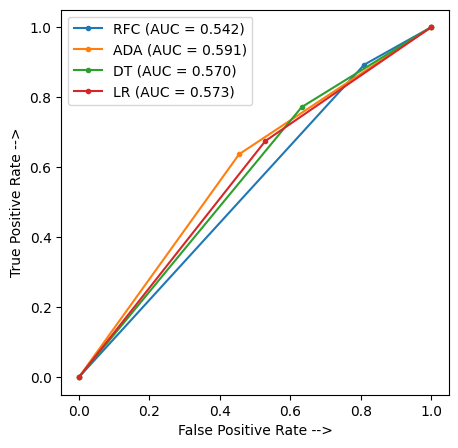

In [353]:
#Get plot for ROC and AUC

from sklearn.metrics import roc_curve, auc

rfc_fpr, rfc_tpr, _ = roc_curve(y_test_rfc, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

ada_fpr, ada_tpr, _ = roc_curve(y_test_ada, y_pred_ada)
auc_ada = auc(ada_fpr, ada_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test_dt, y_pred_dt)
auc_dt = auc(dt_fpr, dt_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test_lr, y_pred_lr)
auc_lr = auc(lr_fpr, lr_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC (AUC = %0.3f)' % auc_rfc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='ADA (AUC = %0.3f)' % auc_ada)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT (AUC = %0.3f)' % auc_dt)
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR (AUC = %0.3f)' % auc_lr)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

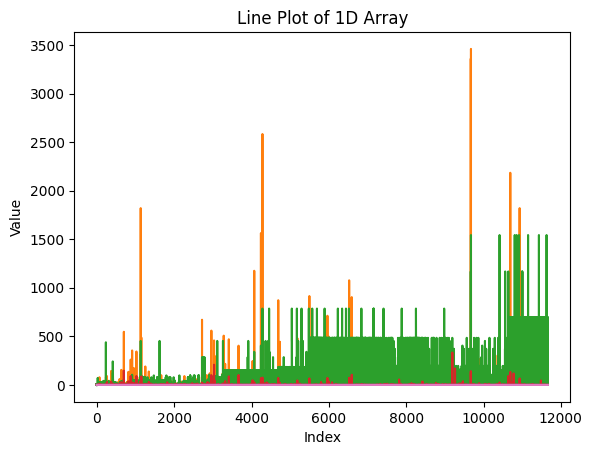

In [354]:
plt.plot(joined_array)
plt.title("Line Plot of 1D Array")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

(11665, 2)
[[-57.24659763   0.10629137]
 [-61.15337968   1.4230285 ]
 [-61.2337278    0.42774092]
 ...
 [ 36.4490555   -7.44702147]
 [-61.23395059   0.42775743]
 [-61.23370538   0.42773525]]


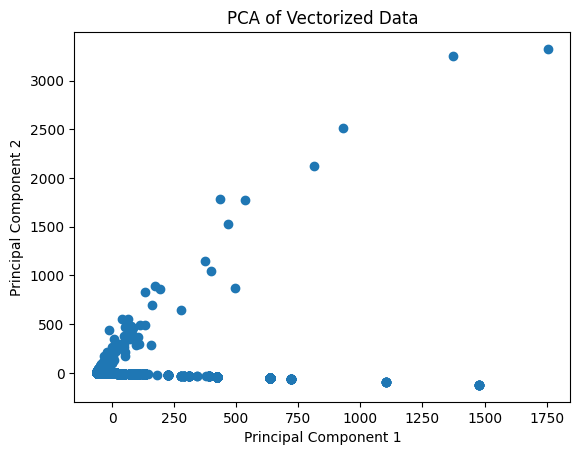

In [357]:
# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(joined_array)

print(reduced_data.shape)
print(reduced_data)


# Plot
plt.scatter(reduced_data[:, 0],reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Vectorized Data')
plt.show()